In [17]:
import pandas as pd
features = [[2.95,6.63], [2.53,7.49], [3.57,5.65], [3.16,5.47], [2.58,4.46], [2.16,6.62], [3.27,3.52]]
labels = [[1],[1],[1],[1],[-1],[-1],[-1]]
features_df = pd.DataFrame(features, columns = ['x_1', 'x_2'])
labels_df = pd.DataFrame(labels, columns = ['y_i'])
joined_features_labels_df = features_df.join(labels_df)
joined_features_labels_df

,x_1,x_2,y_i
0,2.95,6.63,1
1,2.53,7.49,1
2,3.57,5.65,1
3,3.16,5.47,1
4,2.58,4.46,-1
5,2.16,6.62,-1
6,3.27,3.52,-1


In [21]:
joined_features_labels_df.groupby('y_i').mean()

,x_1,x_2
y_i,,
-1,2.6700,4.866667
1,3.0525,6.310000


In [63]:
mi_1 = joined_features_labels_df.groupby('y_i').mean().iloc[1]
mi_1

x_1    3.0525
x_2    6.3100
Name: 1, dtype: float64

In [65]:
mi_2 = joined_features_labels_df.groupby('y_i').mean().iloc[0]
mi_2

x_1    2.670000
x_2    4.866667
Name: -1, dtype: float64

In [70]:
mi = pd.DataFrame(features_df.mean()).transpose().iloc[0]
mi

x_1    2.888571
x_2    5.691429
Name: 0, dtype: float64

In [91]:
import numpy as np
np.subtract(mi_1, features_df)
one_one = pd.Series([1,1])
np.subtract(features_df, mi_1)

,x_1,x_2
0,-0.1025,0.32
1,-0.5225,1.18
2,0.5175,-0.66
3,0.1075,-0.84
4,-0.4725,-1.85
5,-0.8925,0.31
6,0.2175,-2.79


In [106]:
y_i_plus_1_df = joined_features_labels_df.groupby('y_i').get_group(1).drop(['y_i'], axis=1)
y_i_plus_1_df

,x_1,x_2
0,2.95,6.63
1,2.53,7.49
2,3.57,5.65
3,3.16,5.47


In [110]:
x_0_1 = np.subtract(y_i_plus_1_df, mi)
_

,x_1,x_2
0,0.061429,0.938571
1,-0.358571,1.798571
2,0.681429,-0.041429
3,0.271429,-0.221429


In [121]:
y_i_minus_1_df = joined_features_labels_df.groupby('y_i').get_group(-1).drop(['y_i'], axis=1)
y_i_minus_1_df

,x_1,x_2
4,2.58,4.46
5,2.16,6.62
6,3.27,3.52


In [123]:
x_0_2 = np.subtract(y_i_minus_1_df, mi)
x_0_2

,x_1,x_2
4,-0.308571,-1.231429
5,-0.728571,0.928571
6,0.381429,-2.171429


In [125]:
c_1 = x_0_1.cov()
c_1

,x_1,x_2
x_1,0.187625,-0.360400
x_2,-0.360400,0.878667


In [126]:
c_2 = x_0_2.cov()
c_2

,x_1,x_2
x_1,0.3141,-0.832800
x_2,-0.8328,2.526533


In [146]:
C = pd.DataFrame(np.zeros((2,2)))
for i, row in C.iterrows():
    for j, elem in row.iteritems():
        C.iat[i,j] = 4/7 * c_1.iat[i,j] + 3/7 * c_2.iat[i,j]
C

,0,1
0,0.241829,-0.562857
1,-0.562857,1.584895


In [148]:
C_inv = pd.DataFrame(np.linalg.pinv(C.values), C.columns, C.index)
C_inv

,0,1
0,23.845637,8.468501
1,8.468501,3.638446


In [149]:
C_inv.dot(C)

,0,1
0,1.000000e+00,-3.618108e-15
1,2.180700e-15,1.000000e+00


<AxesSubplot:>

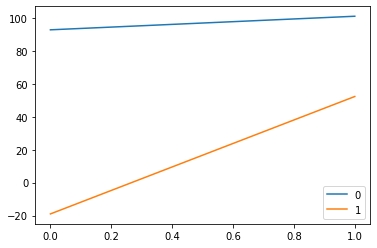

In [163]:
from math import log
x_k = pd.DataFrame([[2.81, 5.46]], columns = ['x_1', 'x_2'])
f_1 = np.multiply(np.multiply(mi_1, C_inv),x_k.transpose())-1/2*np.multiply(np.multiply(mi_1, C_inv),mi_1.transpose())+log(4/7)
f_1.plot()

<AxesSubplot:>

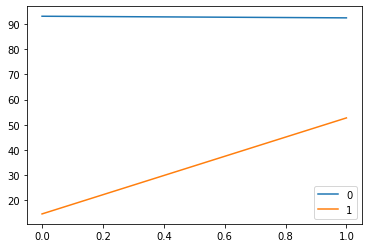

In [164]:
f_2 = np.multiply(np.multiply(mi_2, C_inv),x_k.transpose())-1/2*np.multiply(np.multiply(mi_2, C_inv),mi_2.transpose())+log(3/7)
f_2.plot()

<AxesSubplot:xlabel='x_1', ylabel='x_2'>

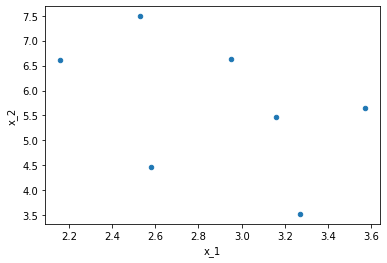

In [181]:
joined_features_labels_df.drop(['y_i'], axis=1).plot.scatter(x='x_1',y='x_2')